# MORPH Dataset Preparation Notebook

This dataset is already split into training, testing, and validation splits, and it is structured as follows:
```text
MORPH:
|---Images
|---|---Test
|---|---Train
|---|---Validation
|---Index
|---|---Test.csv
|---|---Train.csv
|---|---Validation.csv

* It will be reorganized into a single Images folder containing all the images and a labels.csv file containing all the labels and the data split (train-test-val).
* Image will be preprocessing by cropping and resizing.

In [1]:
import numpy as np, pandas as pd, os, shutil, matplotlib.pyplot as plt
import PIL.Image as Image
os.chdir('..')
from utility_scripts.adaface_utils.face_alignment.align import get_aligned_face

In [2]:
output_dir = os.path.join('data', 'datasets', 'age gender and race estimation', 'MORPH')
os.path.exists(output_dir)

True

In [3]:
new_images_path = os.path.join(output_dir, 'Images')
os.makedirs(new_images_path, exist_ok = True)


In [4]:
train_df = pd.read_csv(os.path.join(output_dir, 'Dataset', 'Index', 'Train.csv'))
train_df['split'] = 'train'
train_df['filepath'] = train_df['filepath'].map(lambda x: x.replace('/kaggle/input/morph/', ''))
train_df.head()

,age,gender,filename,filepath,split
0,3,1,00013_00M19.JPG,Dataset/Images/Train/00013_00M19.JPG,train
1,3,1,00013_01M19.JPG,Dataset/Images/Train/00013_01M19.JPG,train
2,3,1,00013_02M19.JPG,Dataset/Images/Train/00013_02M19.JPG,train
3,3,1,00022_03M19.JPG,Dataset/Images/Train/00022_03M19.JPG,train
4,4,1,00022_04M20.JPG,Dataset/Images/Train/00022_04M20.JPG,train


In [5]:
test_df = pd.read_csv(os.path.join(output_dir, 'Dataset', 'Index', 'Test.csv'))
test_df['split'] = 'test'
test_df['filepath'] = test_df['filepath'].map(lambda x: x.replace('/kaggle/input/morph/', ''))
test_df.head()

,age,gender,filename,filepath,split
0,2,1,00189_01M18.JPG,Dataset/Images/Test/00189_01M18.JPG,test
1,3,1,00242_06M19.JPG,Dataset/Images/Test/00242_06M19.JPG,test
2,6,1,00257_01M22.JPG,Dataset/Images/Test/00257_01M22.JPG,test
3,4,1,00425_03M20.JPG,Dataset/Images/Test/00425_03M20.JPG,test
4,21,0,00457_1F37.JPG,Dataset/Images/Test/00457_1F37.JPG,test


In [6]:
val_df = pd.read_csv(os.path.join(output_dir, 'Dataset', 'Index', 'Validation.csv'))
val_df['split'] = 'validation'
val_df['filepath'] = val_df['filepath'].map(lambda x: x.replace('/kaggle/input/morph/', ''))
val_df.head()

,age,gender,filename,filepath,split
0,14,1,00027_01M30.JPG,Dataset/Images/Validation/00027_01M30.JPG,validation
1,24,1,00073_01M40.JPG,Dataset/Images/Validation/00073_01M40.JPG,validation
2,0,1,0007_00M16.JPG,Dataset/Images/Validation/0007_00M16.JPG,validation
3,24,1,00111_01M40.JPG,Dataset/Images/Validation/00111_01M40.JPG,validation
4,8,0,00232_03F24.JPG,Dataset/Images/Validation/00232_03F24.JPG,validation


In [7]:
combined_df = pd.concat((train_df, test_df, val_df))
combined_df.head()

,age,gender,filename,filepath,split
0,3,1,00013_00M19.JPG,Dataset/Images/Train/00013_00M19.JPG,train
1,3,1,00013_01M19.JPG,Dataset/Images/Train/00013_01M19.JPG,train
2,3,1,00013_02M19.JPG,Dataset/Images/Train/00013_02M19.JPG,train
3,3,1,00022_03M19.JPG,Dataset/Images/Train/00022_03M19.JPG,train
4,4,1,00022_04M20.JPG,Dataset/Images/Train/00022_04M20.JPG,train


In [8]:
combined_df.tail()

,age,gender,filename,filepath,split
4996,15,1,99293_02M31.JPG,Dataset/Images/Validation/99293_02M31.JPG,validation
4997,15,1,99335_00M31.JPG,Dataset/Images/Validation/99335_00M31.JPG,validation
4998,4,1,99446_04M20.JPG,Dataset/Images/Validation/99446_04M20.JPG,validation
4999,11,1,99628_00M27.JPG,Dataset/Images/Validation/99628_00M27.JPG,validation
5000,2,1,99698_03M18.JPG,Dataset/Images/Validation/99698_03M18.JPG,validation


In [9]:
for i in range(len(combined_df)): # sanity check
    if not os.path.exists(os.path.join(output_dir, combined_df['filepath'].iloc[i])):
        print(combined_df.iloc[i])

In [ ]:
new_filenames = []
for i in range(len(combined_df)):

    old_image_path = os.path.join(output_dir, combined_df['filepath'].iloc[i])
    new_filename = f'{i}.jpg'
    new_image_path = os.path.join(new_images_path, new_filename)
    
    old_image = Image.open(old_image_path)
    try:
        new_image = get_aligned_face(image_path = None, rgb_pil_image=old_image)
        new_image.save(new_image_path)
    except:
        old_image.resize(size = (112, 112)).save(new_image_path)

    new_filenames.append(new_filename)
    print(f'{i}/{len(combined_df)}')

0/50015
1/50015
2/50015
3/50015
4/50015
5/50015
6/50015
7/50015
8/50015
9/50015
10/50015
11/50015
12/50015
13/50015
14/50015
15/50015
16/50015
17/50015
18/50015
19/50015
20/50015
21/50015
22/50015
23/50015
24/50015
25/50015
26/50015
27/50015
28/50015
29/50015
30/50015
31/50015
32/50015
33/50015
34/50015
35/50015
36/50015
37/50015
38/50015
39/50015
40/50015
41/50015
42/50015
43/50015
44/50015
45/50015
46/50015
47/50015
48/50015
49/50015
50/50015
51/50015
52/50015
53/50015
54/50015
55/50015
56/50015
57/50015
58/50015
59/50015
60/50015
61/50015
62/50015
63/50015
64/50015
65/50015
66/50015
67/50015
68/50015
69/50015
70/50015
71/50015
72/50015
73/50015
74/50015
75/50015
76/50015
77/50015
78/50015
79/50015
80/50015
81/50015
82/50015
83/50015
84/50015
85/50015
86/50015
87/50015
88/50015
89/50015
90/50015
91/50015
92/50015
93/50015
94/50015
95/50015
96/50015
97/50015
98/50015
99/50015
100/50015
101/50015
102/50015
103/50015
104/50015
105/50015
106/50015
107/50015
108/50015
109/50015
110/50015


In [11]:
labels_df = combined_df.copy()

In [12]:
labels_df = labels_df.drop(columns = ['filepath'])

In [13]:
labels_df['filename'] = new_filenames

In [14]:
labels_df['age'] += 16 # MORPH Ages start from 16 years old and is represented as a 0, so offset it.

In [15]:
labels_df.head(10)

,age,gender,filename,split
0,19,1,0.jpg,train
1,19,1,1.jpg,train
2,19,1,2.jpg,train
3,19,1,3.jpg,train
4,20,1,4.jpg,train
5,30,1,5.jpg,train
6,17,0,6.jpg,train
7,19,0,7.jpg,train
8,46,1,8.jpg,train
9,40,1,9.jpg,train


In [16]:
labels_df = labels_df[['filename', 'age', 'gender', 'split']] # reorder the columns

In [17]:
labels_df.to_csv(os.path.join(output_dir, 'labels.csv'), index = False)

# EDA

In [3]:
labels_df = pd.read_csv(os.path.join(output_dir, 'labels.csv'))

In [4]:
labels_df.head()

,filename,age,gender,split
0,0.jpg,19,1,train
1,1.jpg,19,1,train
2,2.jpg,19,1,train
3,3.jpg,19,1,train
4,4.jpg,20,1,train


In [17]:
genders, counts = np.unique(labels_df['gender'], return_counts = True)

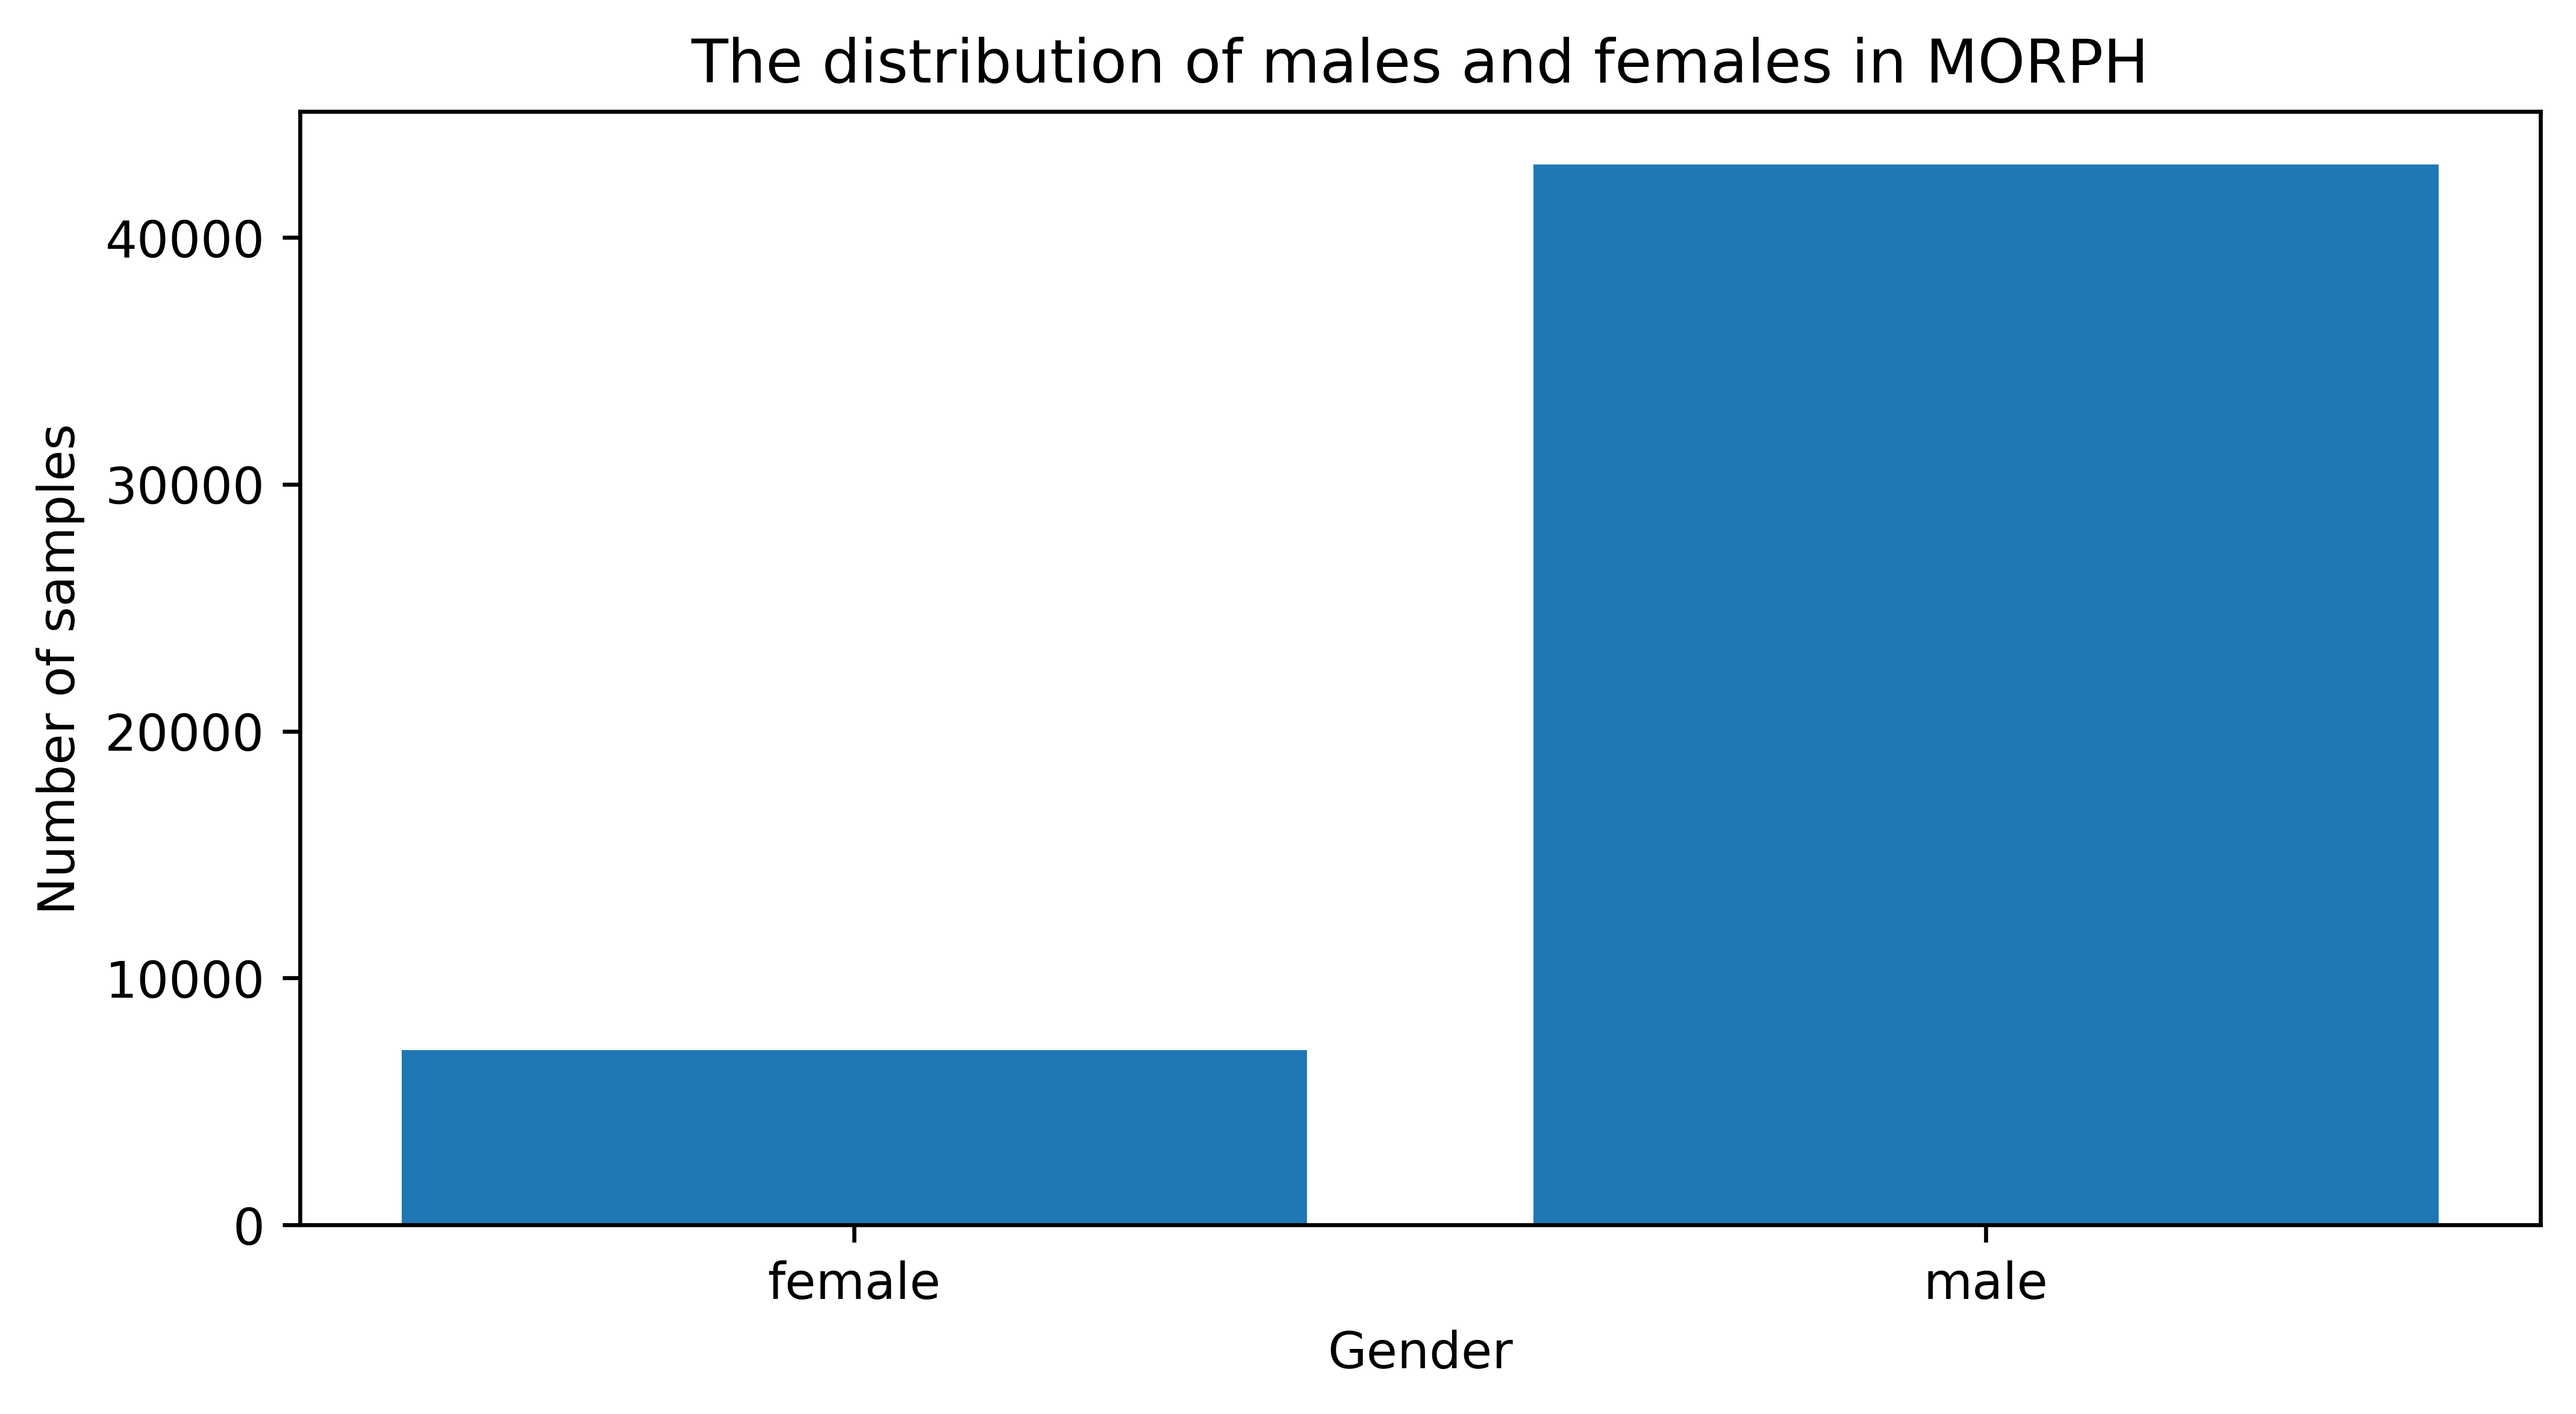

In [18]:
plt.figure(figsize = (8, 4), dpi = 600)
plt.title('The distribution of males and females in MORPH')
plt.bar(x = ['female', 'male'], height = counts)
plt.xlabel('Gender')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'MORPH', 'The distribution of males and females in MORPH')
)
plt.show()

In [19]:
ages, counts = np.unique(labels_df['age'], return_counts = True)

In [20]:
avg_age = sum(ages*counts) / sum(counts)
print(f'The average age in MORPH is: {avg_age}')

The average age in MORPH is: 32.84636609017295


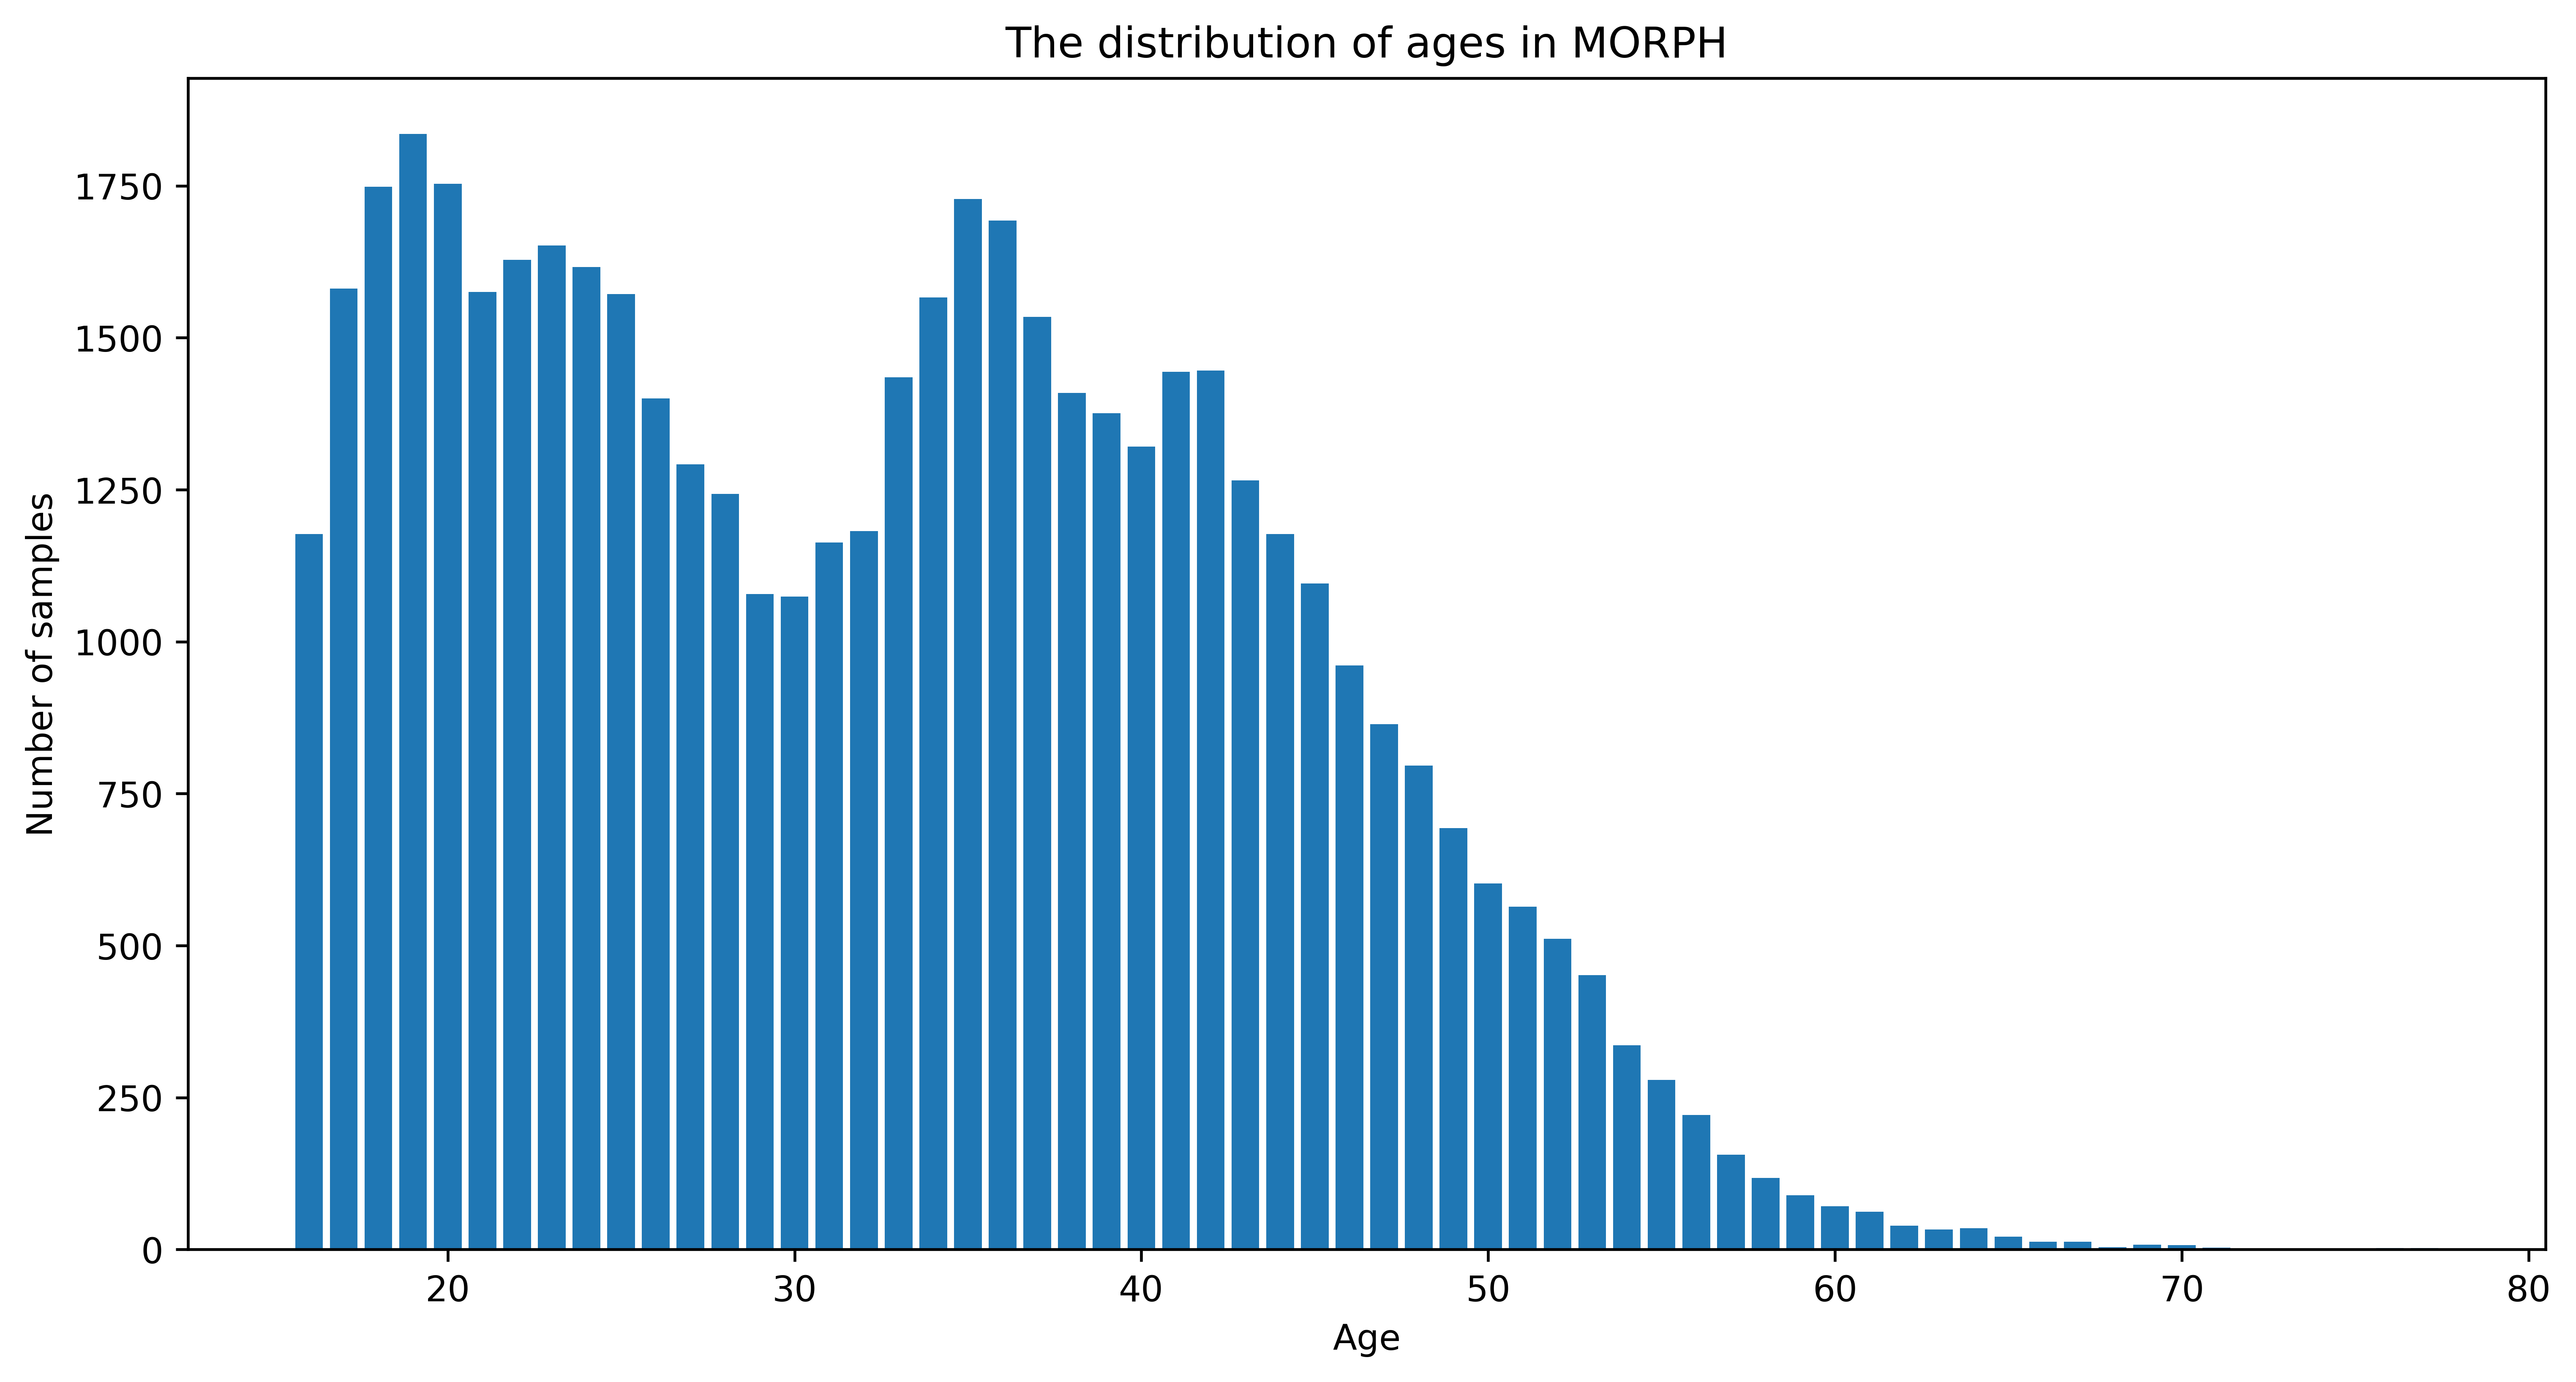

In [21]:
plt.figure(figsize = (12, 6), dpi = 600)
plt.title('The distribution of ages in MORPH')
plt.bar(x = ages, height = counts)
plt.xlabel('Age')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('data', 'figures', 'Age Gender Race', 'MORPH', 'The distribution of ages in MORPH')
)
plt.show()

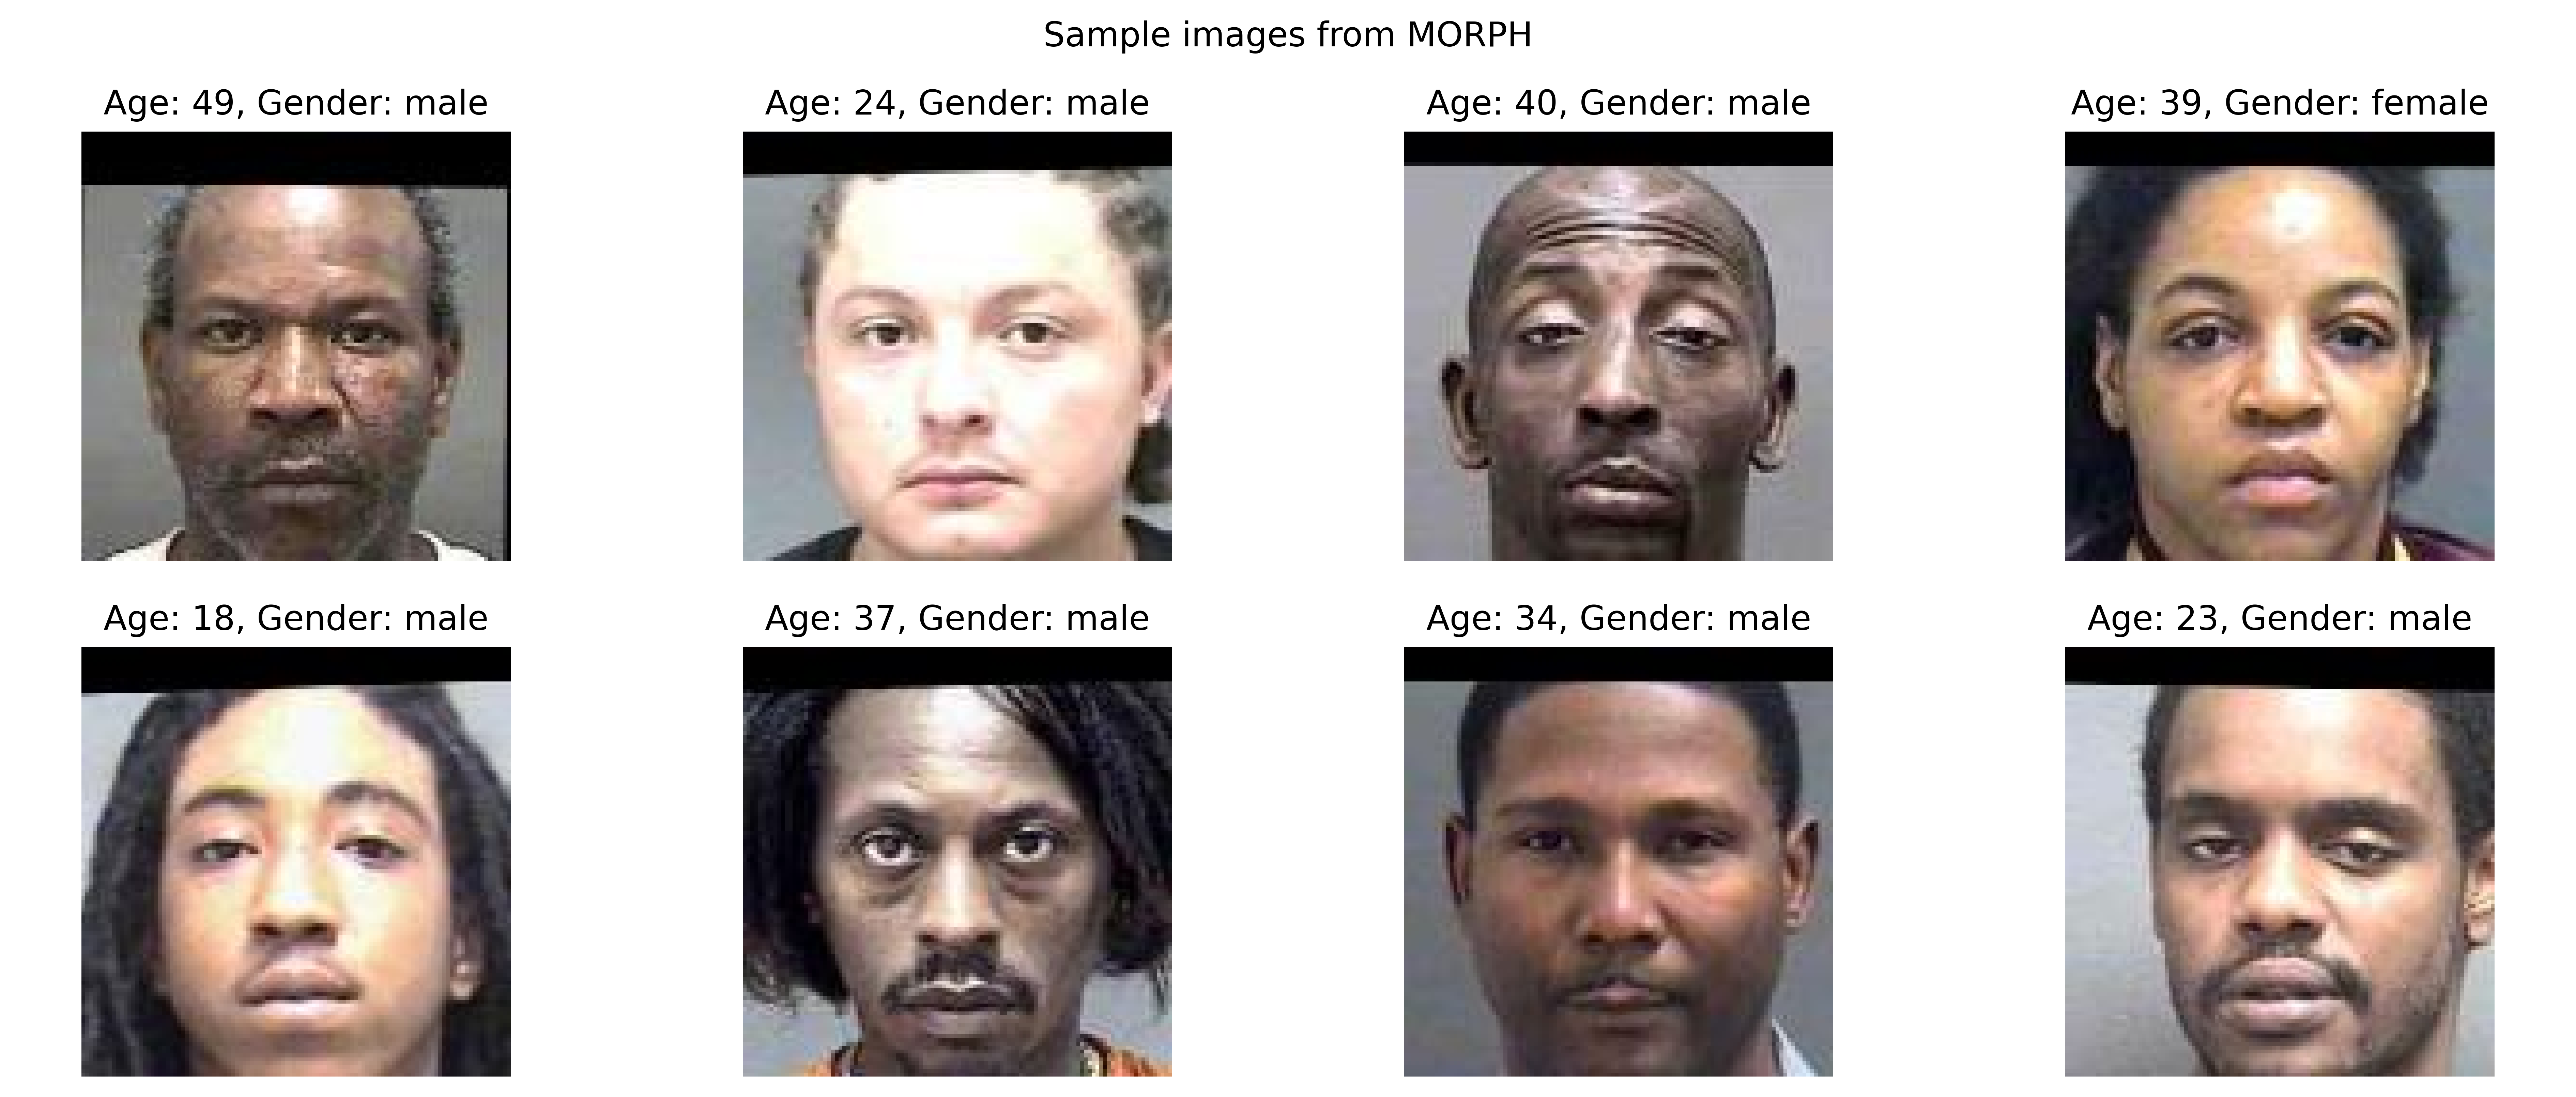

In [27]:
plt.figure(figsize = (16, 6), dpi = 600)
plt.title('Sample images from MORPH', pad = 30)
plt.axis('off')
for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    image = plt.imread(os.path.join(output_dir, 'Images', labels_df['filename'][idx]))
    age = labels_df['age'][idx]
    gender = labels_df['gender'][idx]
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f'Age: {age}, Gender: {'male' if gender else 'female'}')
    plt.axis('off')
plt.savefig(
        os.path.join('data', 'figures', 'Age Gender Race', 'MORPH', 'Sample images from MORPH')
)
plt.show()